<a href="https://colab.research.google.com/github/aeternum-dev/nlp-zsz/blob/master/NLP_project_prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NLP Project

### Loading dependencies [0]

In [15]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install matplotlib
!pip install transformers
!pip install sentencepiece

In [16]:
!rm -r sample_data
!rm -r resources
!git clone https://github.com/aeternum-dev/nlp-zsz.git
!mv nlp-zsz resources

rm: cannot remove 'sample_data': No such file or directory
Cloning into 'nlp-zsz'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 61 (delta 31), reused 13 (delta 5), pack-reused 0
Receiving objects: 100% (61/61), 234.20 KiB | 5.45 MiB/s, done.
Resolving deltas: 100% (31/31), done.


### Scraping data from Rotten Tomatoes[1]

In [17]:
from resources import data_transform as dt
import pandas as pd
import re
import sys
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [18]:
movie_titles = list()
with open("resources/source.txt", "r") as file:
  for line in file:
          movie_titles.append(line.strip())

  reviews_df_raw = dt.pd.DataFrame()

  for movie in movie_titles:
        i = 0
        url_for_comments = f"https://www.rottentomatoes.com/m/{movie}/reviews"
        url_for_the_movie_info = f"https://www.rottentomatoes.com/m/{movie}"

        html_code_comments = dt.get_rotten_tomatoes_html(url_for_comments)
        html_code_movie_info = dt.get_rotten_tomatoes_html(url_for_the_movie_info)

        comments_df = dt.get_comments(html_code_comments, movie)
        print(f"Get the {movie} comments.")
        movie_info_df = dt.get_movie_info(html_code_movie_info)
        print(f"Get the {movie} info.")
        for index, row in comments_df.iterrows():
            if row["Movie"] == movie:
                i += 1

        movie_info_df = pd.concat([movie_info_df] * i, ignore_index=True)
        comments_df = comments_df.join(movie_info_df)
        reviews_df_raw = pd.concat([reviews_df_raw, comments_df], ignore_index=True)
        print(movie, "added successfully!")
        print("")
reviews_df_raw.to_excel("resources/reviews_raw.xlsx", index=False)
reviews_df_raw["Genre:"] = reviews_df_raw["Genre:"].apply(lambda x: [word.strip() for word in x.split()])
reviews_df_raw["Genre"] = reviews_df_raw["Genre:"].apply(lambda x: x[0][:-1].strip() if x and x[0] else None)
reviews_df_raw = reviews_df_raw.drop("Genre:", axis=1)
reviews_df_raw["Genre"] = reviews_df_raw["Genre"] + "_movie"
reviews_df = reviews_df_raw[
    [
            "Movie",
            "Review Text",
            "Genre",
            "Critic Name",
            "Publication",
    ]
  ]
print("")
print(f"Data successfully exported, Movies count: {len(movie_titles)}, Comments count {len(reviews_df)}")
reviews_df.to_excel("resources/reviews.xlsx", index=False)
reviews_df

Get the Inception comments.
Get the Inception info.
Inception added successfully!

Get the Interstellar comments.
Get the Interstellar info.
Interstellar added successfully!

Get the The_Matrix comments.
Get the The_Matrix info.
The_Matrix added successfully!

Get the Elemental_2023 comments.
Get the Elemental_2023 info.
Elemental_2023 added successfully!

Get the last_airbender comments.
Get the last_airbender info.
last_airbender added successfully!

Get the sharknado comments.
Get the sharknado info.
sharknado added successfully!

Get the the_good_the_bad_and_the_ugly comments.
Get the the_good_the_bad_and_the_ugly info.
the_good_the_bad_and_the_ugly added successfully!

Get the akira comments.
Get the akira info.
akira added successfully!

Get the american_psycho comments.
Get the american_psycho info.
american_psycho added successfully!

Get the titanic comments.
Get the titanic info.
titanic added successfully!

Get the avatar comments.
Get the avatar info.
avatar added successfu

,Movie,Review Text,Genre,Critic Name,Publication
0,Inception,"There are thrillers, and then there are thrillers. Gripping every second and couching its pages of exposition in the smartest way possible, Inception is original filmmaking at its finest.",Sci-fi_movie,Akhil Arora,AkhilArora.com
1,Inception,"""Inception"" delivers twists that fit the evolving context of the story it's creating and commandingly wins your attention enough to not turn you off. While it may not seem like it, there is a point and a light at the end of the tunnel to this maze.",Sci-fi_movie,Don Shanahan,Every Movie Has a Lesson
2,Inception,"This film must be revisited, talked about, analyzed, and rewatched again and again. It will surely grow upon each viewing, but it proves instantly enthralling the first time.",Sci-fi_movie,Brian Eggert,Deep Focus Review
3,Inception,"Still one of the best original films of the last 25 years, Inception is a groundbreaking action drama with some of the most intricate plot mapping this side of dreams and reality.",Sci-fi_movie,Cory Woodroof,For the Win (USA Today)
4,Inception,"Fresh, innovative stories told in non-traditional ways...",Sci-fi_movie,Amy Thomasson,InSession Film
...,...,...,...,...,...
737,avengers,"Clever, funny, emotional, and downright amazing; The Avengers is a spectacle which demands repeat viewings. Joss Whedon has delivered what is quite simply an epic comic book movie masterpiece.",Action_movie,Josh Wilding,ComicBookMovie.com
738,avengers,"...not without its flaws, but Joss Whedon has put together an immensely enjoyable film, the best Marvel-based one to date, and one that is not in the least bit ashamed of its comic book roots.",Action_movie,Jim Ross,Roobla
739,avengers,"This star-studded, action packed film lives up to all the hype.",Action_movie,Sarah Knight Adamson,Sarah's Backstage Pass
740,avengers,The Avengers is as close as you can get to a quintessential blockbuster experience. One of the rare MCU films where the action beats feel entirely like extensions of story and character.,Action_movie,Siddhant Adlakha,Slashfilm


### Sentiment Analysis [2]

#### Concatenate dataframe with results [2.a]

In [19]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [20]:
review_sentiments = pd.DataFrame(classifier(list(reviews_df["Review Text"])))


review_sentiments.rename(columns={"label" : "Sentiment",
                                  "score" : "Sentiment Score"},
                          inplace=True)
reviews_df = pd.concat([reviews_df,review_sentiments], axis=1)

reviews_df


,Movie,Review Text,Genre,Critic Name,Publication,Sentiment,Sentiment Score
0,Inception,"There are thrillers, and then there are thrillers. Gripping every second and couching its pages of exposition in the smartest way possible, Inception is original filmmaking at its finest.",Sci-fi_movie,Akhil Arora,AkhilArora.com,POSITIVE,0.999796
1,Inception,"""Inception"" delivers twists that fit the evolving context of the story it's creating and commandingly wins your attention enough to not turn you off. While it may not seem like it, there is a point and a light at the end of the tunnel to this maze.",Sci-fi_movie,Don Shanahan,Every Movie Has a Lesson,POSITIVE,0.999808
2,Inception,"This film must be revisited, talked about, analyzed, and rewatched again and again. It will surely grow upon each viewing, but it proves instantly enthralling the first time.",Sci-fi_movie,Brian Eggert,Deep Focus Review,POSITIVE,0.999445
3,Inception,"Still one of the best original films of the last 25 years, Inception is a groundbreaking action drama with some of the most intricate plot mapping this side of dreams and reality.",Sci-fi_movie,Cory Woodroof,For the Win (USA Today),POSITIVE,0.999861
4,Inception,"Fresh, innovative stories told in non-traditional ways...",Sci-fi_movie,Amy Thomasson,InSession Film,POSITIVE,0.999878
...,...,...,...,...,...,...,...
737,avengers,"Clever, funny, emotional, and downright amazing; The Avengers is a spectacle which demands repeat viewings. Joss Whedon has delivered what is quite simply an epic comic book movie masterpiece.",Action_movie,Josh Wilding,ComicBookMovie.com,POSITIVE,0.999874
738,avengers,"...not without its flaws, but Joss Whedon has put together an immensely enjoyable film, the best Marvel-based one to date, and one that is not in the least bit ashamed of its comic book roots.",Action_movie,Jim Ross,Roobla,POSITIVE,0.999859
739,avengers,"This star-studded, action packed film lives up to all the hype.",Action_movie,Sarah Knight Adamson,Sarah's Backstage Pass,POSITIVE,0.999749
740,avengers,The Avengers is as close as you can get to a quintessential blockbuster experience. One of the rare MCU films where the action beats feel entirely like extensions of story and character.,Action_movie,Siddhant Adlakha,Slashfilm,POSITIVE,0.995951


#### Visualize POSITIVE/NEGATIVE ratios [2.b]



<Axes: title={'center': 'Sentiment ratios on a per movie basis'}, xlabel='Movie'>

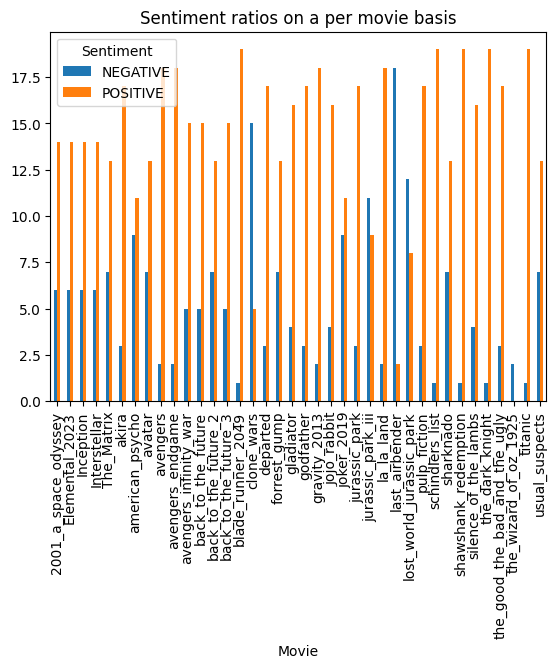

In [22]:
movie_review_sentiment_count = reviews_df[["Movie", "Sentiment"]].groupby("Movie")["Sentiment"].value_counts().unstack().reset_index()
movie_review_sentiment_count.plot(x="Movie",
                                  kind = "bar",
                                  stacked=False,
                                  title ="Sentiment ratios on a per movie basis")

> In the case of more mainstream titles, we can observe a ratio of about 7 positives to 3 negatives. In the case of less know titles the deviation is much more pronounced.

#### Examples of low certainty scores [2.c]

> While the classifier has been able to classify the majority of sample materials with to close to 1.00 certainty scores, there have been some some notable outliers with below 0.75 scores.

In [27]:
outlier_df = reviews_df.sort_values("Sentiment Score").head(5)
pd.options.display.max_colwidth = 300

outlier_df[["Movie","Sentiment", "Sentiment Score", "Review Text"]]

,Movie,Sentiment,Sentiment Score,Review Text
508,jurassic_park_iii,POSITIVE,0.514077,Jurassic Park III exemplifies Hollywood's standard practice of stomping a brilliant concept beyond recognition.
679,departed,POSITIVE,0.572913,"Though the story is a corker of a premise, with detours into the perils of ambition and duplicity, you can't hope to become emotionally invested in these reputedly troubled souls."
502,jurassic_park_iii,POSITIVE,0.573171,Content to serve the basic B-movie needs of its audience.
285,2001_a_space_odyssey,POSITIVE,0.598079,Kubrick translates Clarke's verbal work into a near wordless abstraction for the eyes.
644,silence_of_the_lambs,POSITIVE,0.601316,"Most books, plays or films never give us even this much. Yet The Silence of the Lambs gives us so much that it's a shame the film doesn't find ways to deepen its concentration on the colossal aberrance of the minds of its complementary terrors."


> In case of the above examples, we can see the three review with lowest certainty scores. As it's apparent, after reading through them, there are no clear cut commonalities. Some are probably too verbose, some probably give too little context. Yet, the final results still align to what a human would usually have answered with.


### Zero-shot Classification [3]

#### Store label-groups [3.a]

In [29]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification")

label_groups = [["emotional review","balanced review", "factual review"],
                ["white reviewer", "black reviewer", "asian reviewer"],
                ["positive review", "netrual review", "negative review"],
                ["off-topic", "on-topic"]]

def plot_pie_diagram(classification_result,label_group,title_text):

  counts = pd.Series([x[0] for x in classification_result['labels']]).value_counts()

  #counts = reviews_df['label1'].value_counts()

  plt.figure(figsize=(4, 4))
  counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=None)
  plt.title(title_text)
  legend_labels = [label for label in counts.index if label in label_group]
  plt.legend(labels=legend_labels, loc='lower right')

  print(f"Zero-shot classification according to {label_group}")
  plt.show()

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


#### Ratios of label relevencies on a per label-group basis (classifications will run for a long time) [3.b]

In [35]:
reviews_df["Review Text"].head(4)

0                                                                  There are thrillers, and then there are thrillers. Gripping every second and couching its pages of exposition in the smartest way possible, Inception is original filmmaking at its finest.
1    "Inception" delivers twists that fit the evolving context of the story it's creating and commandingly wins your attention enough to not turn you off.  While it may not seem like it, there is a point and a light at the end of the tunnel to this maze.
2                                                                               This film must be revisited, talked about, analyzed, and rewatched again and again. It will surely grow upon each viewing, but it proves instantly enthralling the first time.
3                                                                          Still one of the best original films of the last 25 years, Inception is a groundbreaking action drama with some of the most intricate plot mapping this side of 

In [ ]:
#Classification
label0 = pd.DataFrame(classifier(list(reviews_df["Review Text"].head(200)), candidate_labels=label_groups[0]))

Zero-shot classification according to ['emotional review', 'balanced review', 'factual review']


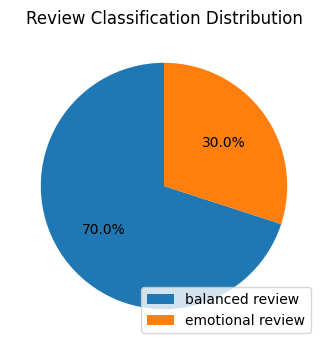

In [36]:
#Visualization
import matplotlib.pyplot as plt
plot_pie_diagram(label0,label_groups[0],"Review Classification Distribution")

In [ ]:
#Classification
label1 = pd.DataFrame(classifier(list(reviews_df["Review Text"]), candidate_labels=label_groups[1]))

Zero-shot classification according to ['white reviewer', 'black reviewer', 'asian reviewer']


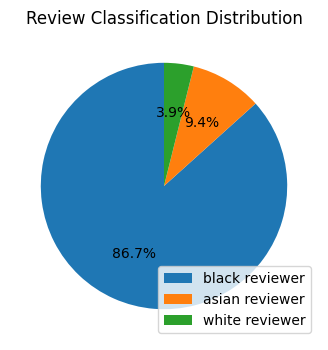

In [ ]:
#Visualization
import matplotlib.pyplot as plt
plot_pie_diagram(label1,label_groups[1],"Review Classification Distribution")

In [ ]:
#Classification
label2 = pd.DataFrame(classifier(list(reviews_df["Review Text"]), candidate_labels=label_groups[2]))

In [ ]:
#Visualization
import matplotlib.pyplot as plt
plot_pie_diagram(label2,label_groups[2],"Review Classification Distribution")

In [ ]:
#Classification
label3 = pd.DataFrame(classifier(list(reviews_df["Review Text"]), candidate_labels=label_groups[3]))

In [ ]:
#Visualization
import matplotlib.pyplot as plt
plot_pie_diagram(label3,label_groups[3],"Review Classification Distribution")

#### Comparison between the Last Airbender and Interstellar [3.c]

In [ ]:
custom_sentiment_labels = [
    'GOOD',
    'BAD',
    'NEUTRAL',
    'EXCELLENT']

genres = ["Action",
"Comedy",
"Drama",
"Horror",
"Romance",
"Science Fiction",
"Thriller",
]

interstellar_df = reviews_df[reviews_df["Movie"] == "Interstellar"]

last_airbender_df = reviews_df[reviews_df["Movie"] == "last_airbender"]

interstellar_sentiments = pd.DataFrame(classifier(list(interstellar_df["Review Text"]), candidate_labels=custom_sentiment_labels))

last_airbender_sentiments = pd.DataFrame(classifier(list(last_airbender_df["Review Text"]), candidate_labels=custom_sentiment_labels))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Concatenate DataFrames
interstellar_df["Custom Sentiment"]= [x[0] for x in interstellar_sentiments['labels']]
last_airbender_df["Custom Sentiment"]= [x[0] for x in last_airbender_sentiments['labels']]


fig, axs = plt.subplots(1, 2, figsize=(8, 8))

sentiment_counts = interstellar_df['custom sentiment'].value_counts()
axs[0].pie(sentiment_counts, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Interstellar')


sentiment_counts = last_airbender_df['custom sentiment'].value_counts()
axs[1].pie(sentiment_counts, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Last Airbender')

legend_labels= [label for label in sentiment_counts.index if label in custom_sentiment_labels]
plt.legend(labels=legend_labels, loc='lower right')

plt.show()

#### Genres [3.d]

In [ ]:
matrix_df = reviews_df[reviews_df["Movie"] == "The_Matrix"]
sharknado_df = reviews_df[reviews_df["Movie"] == "sharknado"]
american_psycho_df = reviews_df[reviews_df["Movie"] == "american_psycho"]

matrix_genres = pd.DataFrame(classifier(list(matrix_df["Review Text"]), candidate_labels=genres))

sharknado_genres = pd.DataFrame(classifier(list(sharknado_df["Review Text"]), candidate_labels=genres))

american_psycho_genres = pd.DataFrame(classifier(list(american_psycho_df["Review Text"]), candidate_labels=genres))
